<div align="center">

# IHE Delft

## Transient Groundwater Flow Course

## Chapter 5: 1D flow

prof. dr.ir. T.N.Olsthoorn

tolsthoorn@gmail.com

Feb. 2025

</div>

# Governing partial differential equation (PDE) for 1D groundwater flow without leakage
In this chapter we deal with transient 1D groundwater flow in a confined aquifer. There is no leakage and no recharge. If recharge is ever important, it can be added through superposition.

The basic concept is the principle of continuity of flow combined with the constitutional relation, know as Darcy's law. The flow only depends on $x$ and $t$. The groundwater water budget of a slice of aquifer of length $\Delta t$ with storage ig given by

$$ \left(Q_x - \left(Q_x + \frac{\partial Q_x}{\partial x} \Delta x \right) \right) \Delta t = S \left(\phi_{t + \Delta t} - \phi_t \right) \Delta x$$

in which $\phi$ is the head and $S$ the aquifers storage coefficient.

Letting $\Delta x$ and $\Delta t$ approach to zero, we get our infinitesimal water budget, which has to be full filled at every  $x$ and $t$

$$ -\frac{ \partial Q_x}{dx} =  S\frac{\partial \phi}{\partial t} $$

Then Darcy comes in telling that $Q_x = - kD \frac{\partial \phi}{\partial x}$, with $kD$ the transmissivity. Filled in yields our governing partial differential equation that valid solution must fulfill

$$ kD\frac{ \partial^2 \phi}{dx^2} = S \frac{\partial \phi}{\partial t} $$

The left side gives the flow into an infinitesimally small slice of the aquifer, while the right side tells you where this flow goes, i.e. it goes into storage.

In the next sections we generally use head change of drawdown $s$ instead of the head $\phi$ to stress that we are dealing with changes of head caused by our own initial and boundary conditions separate from all other processes that are affecting the actual groundwater flow. We can do that because wat we do ourselves can be simply superimposed on that changes or behavior is caused by other independent processes, which too will fulfill the same governing partial differential equation but do that independently of us, which is due to the fact that the governing partial differential equation is linear, so that superposition applies and effects caused by other processes, such as recharge occur and develop completely independent of what we impose onto the groundwater system ourselves.

Now that we have our PDE, we need to find some practical analytical solutions to work with. Such solution to be valid must fulfill the PDE, the initial condition and the boundary conditions. In the sequel we will deal with two solutions only, 1) The flow caused by a sine-wave at $x=0$ and 2) one in which the initial condition is zero head everywhere and the boundary head at $x=0$ is to suddenly changer by a fixed amount and $t=0$ to stay constant thereafter.

# Waves in groundwater

The solution is given below. Hover it is always advised to verify it. This is done by filling the solution into the PDE and see if the PDE then stays true. By doing that in this case, the exercise yields the conditions for which it is true. This gives the relation between the parameters that gives the expression for the damping and delay parameter $a$ shown also below. The exercise is left to the student. Start with

$$ s(x,t) = Ae^{-ax}\sin(\omega t - b x)$$

and show that, in this case, $a=b$ and $a = \sqrt{\frac{\omega S}{2 kS}}$.

Given that the surface water at the face of the aquifer at $x=0$ fluctuations according to a $\sin(\omega t)$. Then given the amplitude of $A$, the head at any point in the aquifer varies according to

$$ s(x, t) = A e^{-ax} \sin(\omega t - a x), \,\,\mathtt{where}\,\,a = \sqrt{\frac{\omega S}{2 kD}}$$

Notice that we can add an arbitrary constant to the argument of the sine function. This constant then represents the angle $x=0$ and $t=0$. This allows us to not start the wave zero at $x=0$.

The velocity of the wave in the subsoil, and hence, its delay between points of different $x$ is obtained by demanding the argument of the sine to be constant

$$\omega t - a x = C \rightarrow \frac {dx}{dt} = \frac {\omega }{a}$$

The discharge is given by taking the derivative of $s(x,t)$ with respect to $x$ and multiplying by $-kD$

$$ Q(x, t) = a kD A e^{-ax} \left( \sin(\omega t - a x) + \cos(\omega t - a x)\right) $$

$$ Q(x, t) = \sqrt{\frac{\omega kD S}{2}} \left( \sin(\omega t - a x) + \cos(\omega t - a x)\right) $$

and because $sin(\eta) + cos(\eta) = \sqrt{2} \sin\left(\eta + \frac {\pi} 4\right)$

$$ Q(x, t) = \sqrt{\omega kD S} \,\, \sin \left(\omega t - a x + \frac {\pi} 4\right)$$

To show how much time the discharge $Q(x, t)$ lags behind the head $s(, t)$, just look at $x=0$ and compute what the time is that makes the discharge at $x=0$ zero, and in which we may write $\omega = \frac {2 \pi}{T}$

$$\omega \, t_{delay} = \frac{\pi}{4} \,\,\ \rightarrow \,\, t_{delay} = \frac 1 {\omega} \frac {\pi} 4 = \frac T 2$$

or half the cycle time.

We will show this solution below as a function of $x$ for a few times.

In [2]:
# First import the modules with the functionality that we need:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erfc

Let's now show a few groundwater head waves in the aquifer and also show the envelopes between which the head varies. The envelopes are $\pm A e ^{-a}$

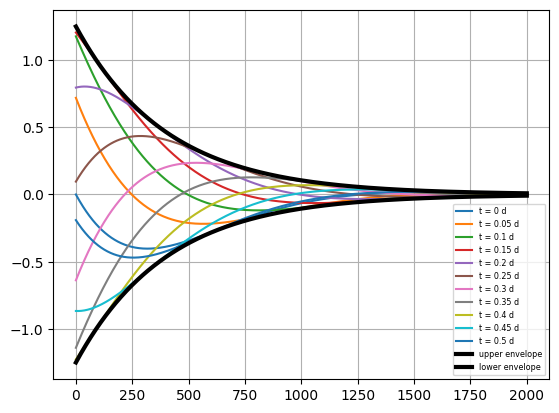

In [2]:
A = 1.25 # amplitude at x=0 [m]
omega = 2 * np.pi / (12.3 / 24) # angular velocity [radians / day]
S = .001 # specific yield or elastic storage coefficient [-]
kD = 1000. # transmissivity [m2/d]
a = np.sqrt(omega * S / (2 * kD)) # damping [1/m] 

x= np.linspace(0, 2000, 1001) # points at which we compute the head [m]
t =0.1

for t in np.linspace(0, 0.5, 11):
    s = A * np.exp(-a * x) * np.sin(omega * t - a * x)
    plt.plot(x, s, label=f"t = {t:.3g} d")
    
env = A * np.exp(-a * x)
plt.plot(x, +env, 'k', lw=3, label='upper envelope')
plt.plot(x, -env, 'k', lw=3, label='lower envelope')
plt.grid()
plt.legend(loc='lower right', fontsize='xx-small')

Let's now superimpose a number of waves each with its own amplitude, frequency and initial value. This superposition can be written out mathematically as

$$s(x,t) = \sum_{i=0}^N \left( A_i e^{-a_i x} \sin(\omega_i - a_i x + \theta_i) \right)$$

First determine the values to use for the parameters

In [3]:
As = np.array([1.0, 1.5, 0.7, 0.3])
omegas = 2 * np.pi / np.array([0.1, 0.3, 0.5, 0.7])
thetas = 2 * np.pi * np.array([0.0, 0.1, 0.5, 0.7])
a_s = np.sqrt(omegas * S / (2 * kD))

print("As = ", As)
print("omegas = ", omegas)
print("thetas = ", thetas)
print("a_s = ", a_s)

As =  [1.  1.5 0.7 0.3]
omegas =  [62.83185307 20.94395102 12.56637061  8.97597901]
thetas =  [0.         0.62831853 3.14159265 4.39822972]
a_s =  [0.00560499 0.00323604 0.00250663 0.00211849]


Then apply them and do the superposition of these waves. And show them for a number of times for all $x$-values.

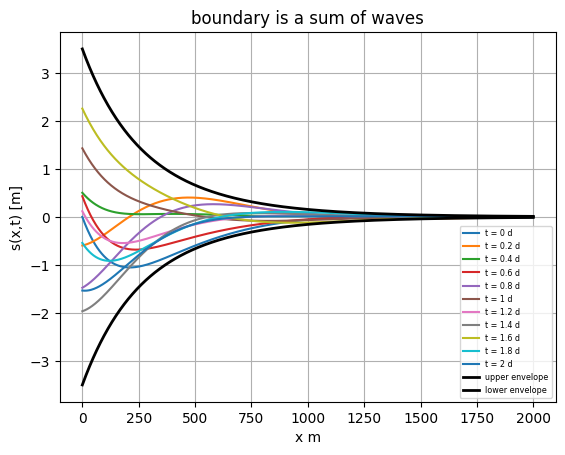

In [ ]:
for t in np.linspace(0, 2, 11):
    s   = np.zeros_like(x)
    env = np.zeros_like(x)
    for A, omega, a, theta in zip(As, omegas, a_s, thetas):
        s += A * np.exp(-a * x) * np.sin(omega * t - a * x)
        env += A * np.exp(-a * x)
    
    plt.plot(x, s, label=f"t = {t:.3g} d")

plt.plot(x, +env, 'black', lw=2, label="upper envelope")
plt.plot(x, -env, 'black', lw=2, label="lower envelope")
plt.grid()
plt.title("boundary is a sum of waves")
plt.xlabel('x m')
plt.ylabel('s(x,t) [m]')
    
plt.legend(loc="lower right", fontsize='xx-small')

We can also show the for all times and a few $x$-values, which is what we would actually measure in piezometers. The exercise is left to the student.

## Half inifnite aquifer with sudden change of head at $x=0$.

The formula to compute this is

$$ s(x, t) = A \, \mathtt{erfc}(u), \,\,\mathtt{with}\,\,\,u=\sqrt{\frac{x^2 S}{4 kD t}}$$

Where $A$ is the magnitude of the sudden rise of head at $x=0$ and %t=0$ and $\mathtt{erfc}$ is a standard function defined as

$$ \mathtt{erfc}(\zeta ) = \frac 2 {\sqrt{\pi}} \intop_\zeta^\infty e^{-y^2} dy$$

The discharge then follows form Darcy as $Q(x, t) = -kD \frac{\partial s}{\partial x}$. With $ \frac {d \, \mathtt{erfc}(u)}{du} = -\frac 2{\sqrt{\pi}} e^{-u^2}$ and with $\frac{\partial u}{\partial x} = \sqrt{\frac{S}{4 kD t}}$, we get

$$ Q(x, t) = \sqrt{\frac{kD S}{\pi t}} e^{-u^2}$$

For $x=0$ the exponent becomes just 1.

There exists a solution leaky-aquifer case for the same boundary and initial condition (Bruggeman (1999), solution 114.02, p59), but which is much more complicated.

(Bruggeman, GA (1999) Analytical solution of geohydrological problems. Elsevier, ISBN 0-444-81829-4, 998pp)

Next we show the $\mathtt{erfc}$ function both as a function of $u$ (i.e. proportional or similar to $x$) and as a function of $1/u$ (i.e. proportional or similar to $\sqrt{t}$)

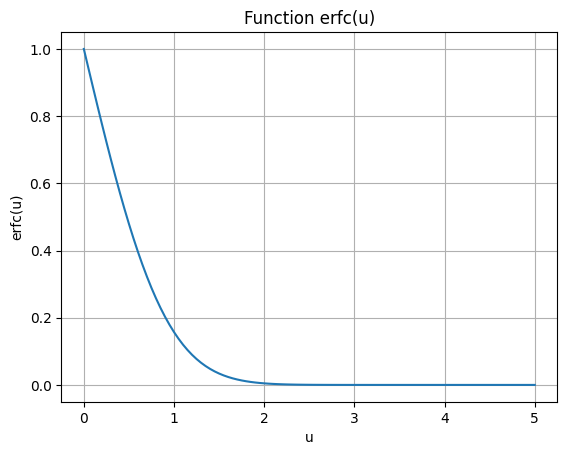

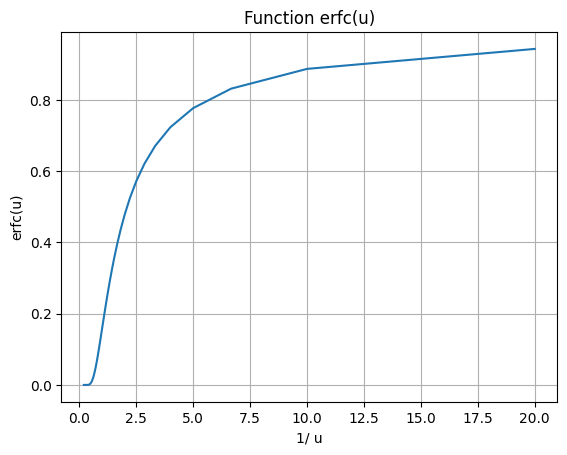

In [3]:
u = np.linspace(0, 5, 101)

plt.title("Function erfc(u)")
plt.xlabel("u")
plt.ylabel("erfc(u)")
plt.grid()
plt.plot(u, erfc(u))
plt.show()

plt.title("Function erfc(u)")
plt.xlabel("1/ u")
plt.ylabel("erfc(u)")
plt.grid()
plt.plot(1 / u[1:], erfc(u[1:]))
plt.show()

Next we show the development of the head over time by showing the graph as a function of $x$ instead of $u$ for a number of times.

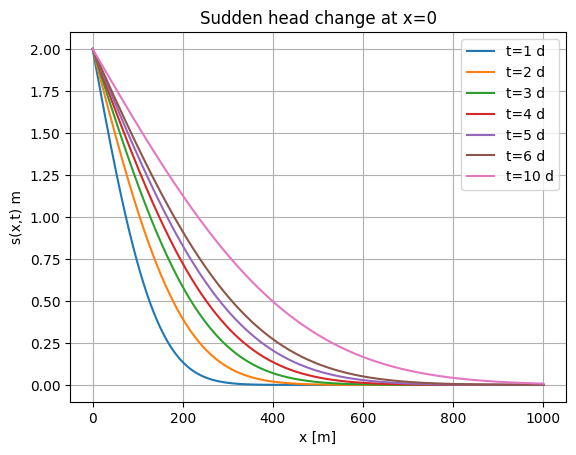

In [ ]:
A = 2 # amplitude in m
S = 0.1 # []
kD = 600 # m2/d

x = np.linspace(0, 1000, 1001)
times = [1, 2, 3, 4, 5, 6, 10]

for t in times:
    s = A * erfc(x * np.sqrt(S / (4 * kD * t)))
    plt.plot(x, s, label=f"t={t} d")
plt.title("Sudden head change at x=0")
plt.xlabel("x [m]")
plt.ylabel("s(x,t) m")
plt.grid(True)
plt.legend()

Next, we show the development of the head as a function time for a number of $x$-values, which is what we expect to measure in piezometers.

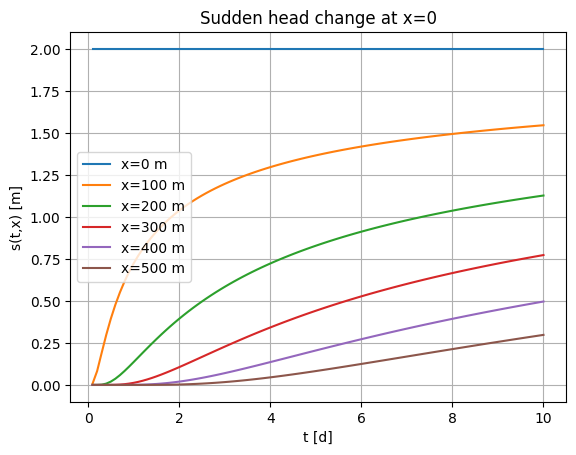

In [ ]:
A = 2  # amplitude in m
S = 0.1  # []
kD = 600  # m^2/d

t = np.linspace(0.1, 10, 100)  # Avoid t=0 to prevent division by zero
x_values = [0, 100, 200, 300, 400, 500]  # Selected x values

for x in x_values:
    s = A * erfc(x * np.sqrt(S / (4 * kD * t)))
    plt.plot(t, s, label=f"x={x} m")

plt.title("Sudden head change at x=0")
plt.xlabel("t [d]")
plt.ylabel("s(t,x) [m]")
plt.grid(True)
plt.legend()
plt.show()


Finally we use the function to carry out superposition. The example blow shows the effect on the groundwater of a lake of which the level increases over time.

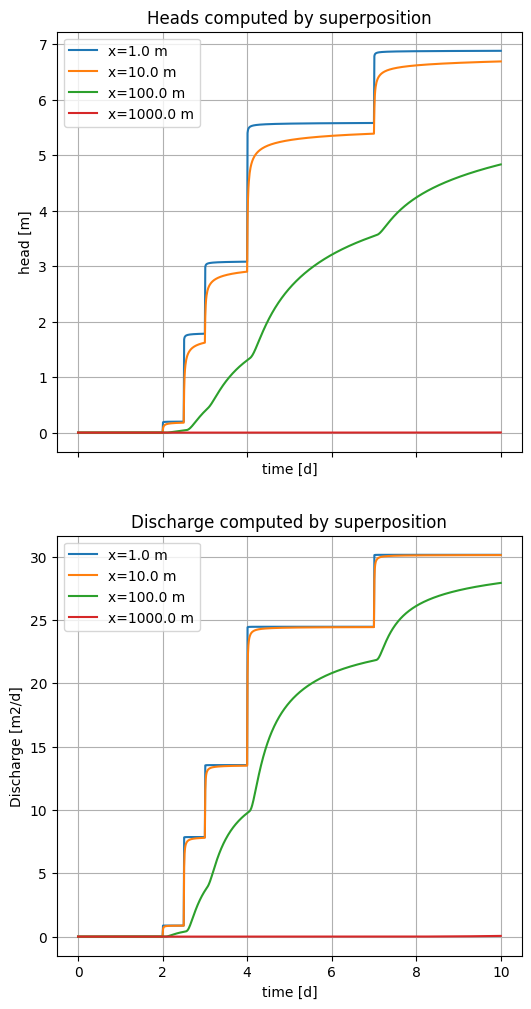

In [4]:
S, kD = 0.1, 600

h = np.array([1, 1.2, 2.8, 4.1, 6.6, 7.9]) # water elevation at x=0 [m]
times= [1, 2, 2.5, 3, 4, 7]      # list of measurement times

dh = np.diff(h)

t = np.linspace(0, 10, 1001)
xs = [1., 10., 100., 1000.]

F = np.sqrt(kD * S / np.pi)

Fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(6, 12))
for x in xs:
    s = np.zeros_like(t)
    Q = np.zeros_like(t)
    for ti, dhi in zip(times[1:], dh):
        # print(x, ti, dhi)
        u = x * np.sqrt(S / (4 * kD * (t[t > ti] - ti)))
        s[t > ti] += dhi * erfc(u)
        Q[t > ti] += dhi * F * np.exp(-u ** 2)
    ax1.plot(t, s, label=f"x={x} m")
    ax2.plot(t, Q, label=f"x={x} m")

ax1.set(title="Heads computed by superposition", xlabel="time [d]", ylabel="head [m]")
ax2.set(title="Discharge computed by superposition", xlabel="time [d]", ylabel="Discharge [m2/d]")
ax1.grid()
ax2.grid()
ax1.legend()
ax2.legend()

plt.show()


## Groundwater basins

Groundwater basins van be envisioned as a strip of land between straight fixed-head boundaries. The properties, kD and S of such basins and especially their width determine their time behavior such as head build up due to recharge, and decline during lack of recharge. This behavior is largely characterized by the system's characteristic time, af factor that determines the time-memory of the system and is comprised of its parameters $kD$, $S$, and half-width $b$.

The analytic solution for the drainage of such a groundwater system given an initial head $A$ above its both boundaries is given by

$$s(x, t) = A \frac 4 \pi \sum_{j=1}^\infty \left\{ \frac{(-1)^{j-1}}{2j - 1}
\cos\left((2j - 1) \left(\frac \pi 2 \right) \left(\frac x b \right)\right)
\exp\left[     -(2j - 1)^2 \left(\frac \pi 2\right)^2 \frac{kD}{b^2 S} t \right ]
\right\}
$$

while the discharge can be obtained from $Q_{x,t} = -kD \frac{\partial  s(x, t)}{\partial x} $

To study the behavior we first realize that each term is built up of a cosine that only depends on the independent parameter $x$ and an exponent that only depends on independent parameter $t$.

Further notice that the exponent rapidly declines with time and that the second term, which has an argument 9 times as large as the first term rapidly declines with $i$ in the series. The third and higher terms decline even faster. Therefore, after some time, only the first term of the entire series matters and the rest can be neglected.

For this compare the exponent in the second term with that in the first term and demand it to be much smaller

$$ \exp \left(-9\left( \frac \pi 2 \right)^2 \frac t T \right) \ll \exp \left(- \left(\frac \pi 2\right)^2 \frac t T \right)$$

$$ \exp \left(-9\left( \frac \pi 2 \right)^2 \frac t T \right) = \epsilon  \exp \left(- \left(\frac \pi 2\right)^2 \frac t T \right)$$

with $\epsilon$ a small number. Taking the logarithm of both sides gives

$$-8\left( \frac \pi 2 \right)^2 \frac t T  = \ln \epsilon$$

Taking for convenience $\epsilon = 0.01$, we get

$$ t = -\frac{\ln \epsilon}{2 \pi^2}  T  = 0.23 T$$ 

where the characteristic time defined as $T=\frac{b^2 S}{kD}$.

Therefore already when $t \approx  0.25 T$ we can safely neglect all higher terms of the series in the solution.

The remaining first term thus becomes

$$s(x, t) = A \frac 4 \pi 
\cos\left(\frac \pi 2 \, \frac x b \right)
\exp\left[     -\left(\frac \pi 2\right)^2 \frac t T \right ]
$$

which is simple enough. It tells us that the basin will drain according to a cosine of which the height declines exponentially. Although the defined characteristic time is suitable in its own right, a more intuitive characteristic of any exponentially declining system is its halftime. The halftime can be readily obtained from the exponent by requiring to to be half its value after time proceeded by one halftime

$$ \exp \left(
    - \left(\frac \pi 2 \right)^2 \frac{t + T_{50\%}} T 
    \right)
    = 0.5
\exp \left(
     -\left( \frac \pi 2 \right)^2 \frac t T
      \right)
$$

Therefore, 

$$ T_{50\%}   = \left(\frac 2 \pi \right) ^ 2\ln(2) T \approx 0.28 T$$

which is a little over a quarter of our characteristic time $T = \frac{b^2 S}{kD}$.


The example below shows the drainage in action. It starts as a block with uniform head and then drains towards its boundaries. The times for which the lines are plotted are multiples of the halftime.

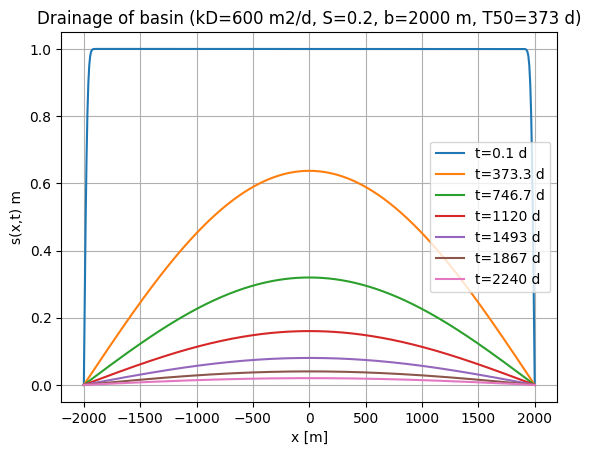

In [14]:
kS, S, b, A = 600, 0.2, 2000, 1.
x = np.linspace(-b, b, 501)

T = b ** 2 * S / kD
T50 = 0.28 * T

po2 = np.pi / 2

n = 100
for t in np.hstack((1e-1, np.arange(1, 7) * T50)):
    s = np.zeros_like(x)
    for j in range(1, n):
        j2m1 = (2 * j - 1)    
        s += (-1) ** (j - 1) / j2m1 * np.cos(j2m1 * po2 * x / b ) * np.exp(-(j2m1 ** 2) * po2 ** 2 * t / T)
    s *= 4 * A / np.pi
    plt.plot(x, s, label=f"t={t:.4g} d")
plt.title(f"Drainage of basin (kD={kD} m2/d, S={S}, b={b} m, T50={T50:.3g} d)")
plt.xlabel("x [m]")
plt.ylabel("s(x,t) m")
plt.grid()
plt.legend()

Next let's characterize a few basins and see that their halftimes are

In [43]:
import pandas as pd
from IPython.core.display import HTML

columns = ['Aquifer system', 'Country', 'kD[m2/d]', 'Sy', 'b[m]']
data = [
['Nubian',      'Egypt',        500, 0.1, 500000],
['Kalahari',    'Botswana',     500, 0.1,   300000],
['Veluwe',      'Netherlands', 6000, 0.27,   20000],
['Dunes coast', 'Netherlands',  200, 0.2,     2000],
['Tulip bulbs', 'Netherlands',  200, 0.15,      50],
]
basins = pd.DataFrame(data=data, columns=columns)

basins['T50[d]'] = 0.28 * basins['b[m]'] ** 2 * basins['Sy'] / basins['kD[m2/d]']
basins['T50[yr]'] = basins['T50[d]'] / 365
basins.loc[:, 'T50[d]'] = np.round(basins.loc[:, 'T50[d]'], 2)
basins.loc[:3, 'T50[yr]'] = np.round(basins.loc[:3, 'T50[yr]'])
basins


,Aquifer system,Country,kD[m2/d],Sy,b[m],T50[d],T50[yr]
0,Nubian,Egypt,500,0.10,500000,14000000.00,38356.000000
1,Kalahari,Botswana,500,0.10,300000,5040000.00,13808.000000
2,Veluwe,Netherlands,6000,0.27,20000,5040.00,14.000000
3,Dunes coast,Netherlands,200,0.20,2000,1120.00,3.000000
4,Tulip bulbs,Netherlands,200,0.15,50,0.52,0.001438


The desert values may well be questioned. For instance, to what extent the Nubian sandstone aquifer can be regarded as a water table aquifer and to what extent as a confined aquifer. On the very large scale in space and especially time, even a large almost confined aquifer becomes a water table aquifer if there are not boundaries to fix the head.

-----